In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel('C:/Users/Lenovo/OneDrive/Documents/ML/aireline_ticket_price/Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
#missign values  ,,, cleaning data

In [6]:
train_data.isna().sum()  #find missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True) #remove all missing values

In [8]:
train_data.isna().sum()  #find missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def change_into_datetime(col):                            # changing column type beacuse Date_of_Journey,etc columns have datetime datatype
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\920711274.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[col]=pd.to_datetime(train_data[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\920711274.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col]=pd.to_datetime(train_data[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\920711274.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col]=pd.to_datetime(train_data[col])


In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day          #splitting the Date_of_Journey column 
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-08 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-08 05:50:00,2025-05-08 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-08 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-05-08 18:05:00,2025-05-08 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-05-08 16:50:00,2025-05-08 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [16]:
train_data.drop('Date_of_Journey',axis=1,inplace=True) #droping table beacuse we extract important information from the column 

In [17]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour

def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [18]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-05-08 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-05-08 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
'2h 50m'.split(' ')

['2h', '50m']

In [23]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + '0m'
        else:
            duration[i]='0h' + duration[i]

In [24]:
train_data['Duration']=duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
'4h 45m	'.split(' ')[0][0:-1]

'4'

In [27]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    parts = x.split(' ')
    return parts[1][0:-1] if len(parts) > 1 else '0'


In [28]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_minutes']=train_data['Duration'].apply(minute)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,9,6,9,25,4,25,19h0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
drop_column(train_data,'Duration')

In [31]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int32
journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours         object
Duration_minutes       object
dtype: object

In [32]:
'''train_data['Duration']=train_data['Duration_hours'].astype(int)
train_data['Duration_minutes']=train_data['Duration_minutes'].astype(int)
'''

train_data['Duration_hours'] = train_data['Duration_hours'].str.replace('h', '', regex=False).astype(int)
train_data['Duration_minutes'] = train_data['Duration_minutes'].str.replace('m', '', regex=False).astype(int)


In [33]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int32
journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours          int64
Duration_minutes        int64
dtype: object

In [34]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [35]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='object']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

In [36]:
#handle categorical data
#perform feature encoding data on data

In [37]:
#categorical data is of two types :
#nominal data  --onehot         --non herarchical data ex.country name ,not any order
#ordinal data --label encoder           --herarchical data ,ex .good ,better ,best

In [38]:
categorical=train_data[cat_col]

In [39]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [40]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

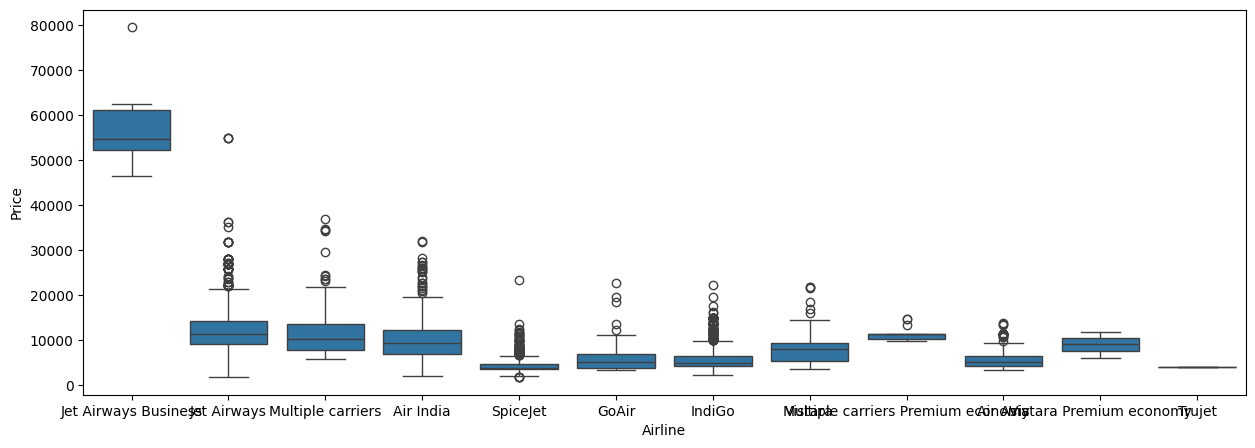

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [42]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,190,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


<Axes: xlabel='Total_Stops', ylabel='Price'>

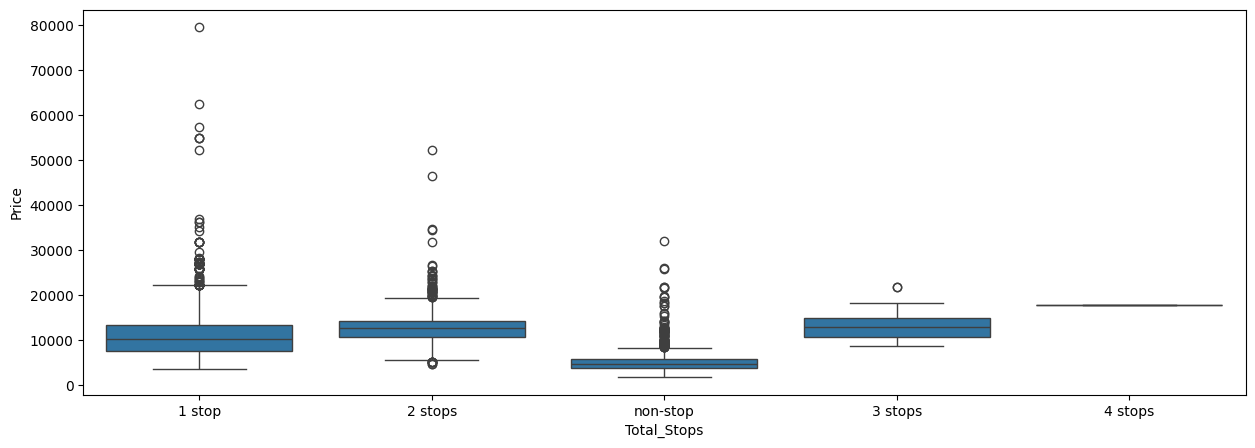

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [44]:
Airline =pd.get_dummies(categorical['Airline'],drop_first=True).astype(int)

In [45]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
Airline.dtypes

Air India                            int64
GoAir                                int64
IndiGo                               int64
Jet Airways                          int64
Jet Airways Business                 int64
Multiple carriers                    int64
Multiple carriers Premium economy    int64
SpiceJet                             int64
Trujet                               int64
Vistara                              int64
Vistara Premium economy              int64
dtype: object

In [47]:
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

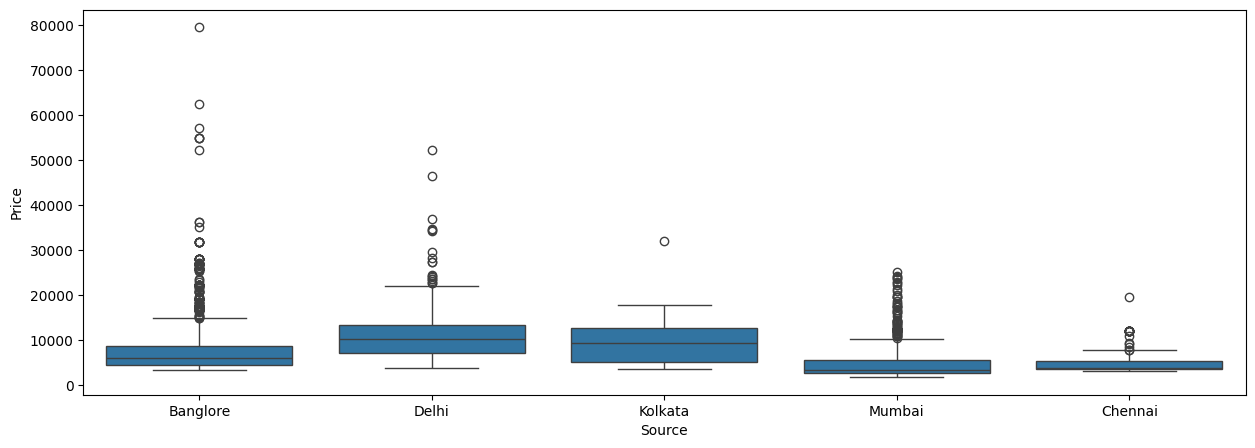

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [49]:
Source =pd.get_dummies(categorical['Source'],drop_first=True).astype(int)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [50]:
categorical['Destination'].value_counts()    

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

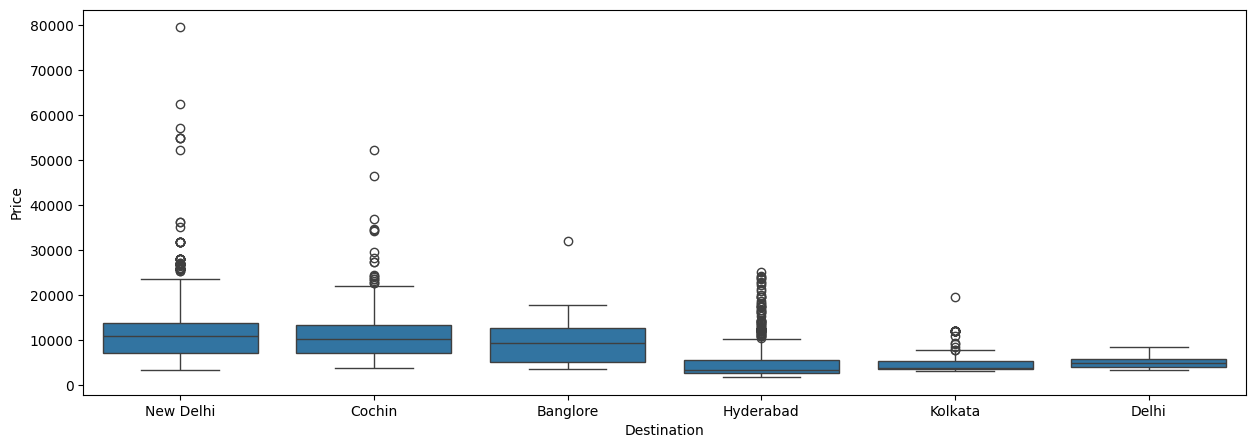

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [52]:
Destination =pd.get_dummies(categorical['Destination'],drop_first=True).astype(int)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [53]:
# Ensure 'Route' column exists in the DataFrame
categorical = train_data[['Airline', 'Source', 'Destination', 'Route','Additional_Info','Total_Stops']].copy()

# Safely create new columns from the 'Route' column
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [54]:
categorical.head()

,Airline,Source,Destination,Route,Additional_Info,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,1 stop,BLR,NAG,DEL,NaN,NaN


In [55]:
drop_column(categorical,'Route')

In [56]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Total_Stops            0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [57]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Total_Stops',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [58]:
for i in  ['Route_3','Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\1730276283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical[i].fillna('None',inplace=True)


In [59]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Total_Stops        0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [60]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Additional_Info has total 10 categories
Total_Stops has total 5 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder=LabelEncoder()

In [63]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Total_Stops',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [64]:
for i in ['Route_1', 'Route_2', 'Route_3','Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [65]:
categorical.head()

,Airline,Source,Destination,Additional_Info,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,No info,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,No info,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,No info,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,No info,1 stop,0,34,8,13,5


In [66]:
drop_column(categorical,'Additional_Info')

In [67]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [69]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [70]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [91]:
data_train=pd.concat([categorical.Airline,categorical['Source'],categorical['Destination'],categorical['Total_Stops'],categorical['Route_1'],categorical['Route_2'],categorical['Route_3'],categorical['Route_4'],categorical['Route_5'],Airline,Destination,train_data[cont_col]],axis=1)

In [93]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,190,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [94]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [97]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,190,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [99]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,190,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [100]:
# Q1. outlier detection and outlier imputation if avaliable in data..
# Q2. Seprate out your independentfeature and dependent feature

In [101]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\131577315.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


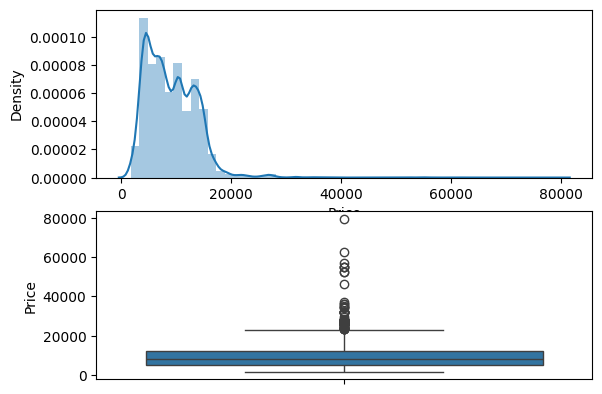

In [102]:
plot(data_train,'Price')

In [103]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\131577315.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


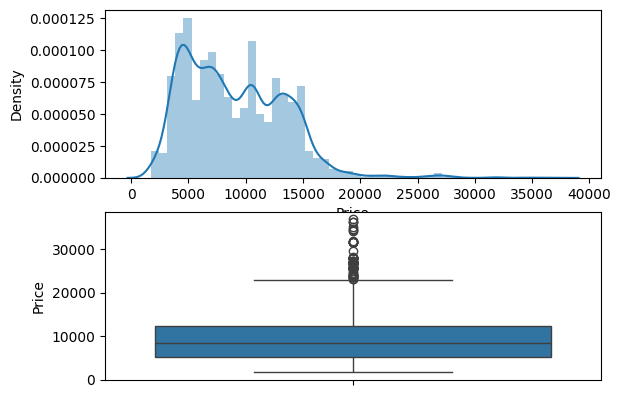

In [104]:
 plot(data_train,'Price')

In [105]:
data_train.shape

(10682, 31)

In [106]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,9,6,9,25,4,25,190,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,4,45


In [107]:
X.shape

(10682, 30)

In [108]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [109]:
# Q.Apply feature selection on data..

In [110]:
from sklearn.feature_selection import mutual_info_classif

In [111]:
mutual_info_classif(X,y)

array([1.89358778e+00, 2.31208912e+00, 3.03295635e+00, 2.60146206e+00,
       1.72418580e+00, 1.41002052e+00, 6.82897125e-01, 9.71147933e-02,
       6.14854168e-01, 9.08313061e-01, 2.04359770e-03, 5.11242143e-01,
       1.79118897e-02, 3.12110519e-01, 0.00000000e+00, 2.16567502e-01,
       0.00000000e+00, 1.37575848e+00, 4.01190812e-01, 2.74517156e-01,
       1.75145155e-01, 3.55075095e-01, 8.84268815e-01, 1.69025515e+00,
       1.51402306e+00, 1.25055519e+00, 1.92889483e+00, 1.63228517e+00,
       1.81940922e+00, 1.14843510e+00])

In [112]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.908554
Route_1,2.293776
Route_2,3.025804
Route_3,2.595007
Route_4,1.707449
Route_5,1.473223
Air India,0.687485
GoAir,0.081515
IndiGo,0.627910
Jet Airways,0.883831


In [113]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,3.025804
Route_3,2.595007
Route_1,2.293776
Arrival_Time_hour,1.916151
Total_Stops,1.908554
Duration_hours,1.801467
Route_4,1.707449
journey_month,1.634387
Arrival_Time_minute,1.618603
Dep_Time_hour,1.494914


In [114]:
# Q. Applying machine learning on your data and automate your predections

In [115]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2)

In [128]:
from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('traning score: {}'.format(model.score(X_train,y_train))) 
    predections=model.predict(X_test)
    print('predections are: {}'.format(predections))
    print('\n')
    r2_score=metrics.r2_score(y_test,predections)
    print('r2 score is: {}'.format(r2_score))
    print('MAE: ',metrics.mean_absolute_error(y_test,predections))
    print('MSE: ',metrics.mean_squared_error(y_test,predections))
    print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test,predections)))
    sns.distplot(y_test-predections)    

In [129]:
from sklearn.ensemble import RandomForestRegressor

traning score: 0.9636759820826226
predections are: [12378.99609524 13256.38       11185.9        ...  7596.83
 11665.40866667  9971.71      ]


r2 score is: 0.7901099355543122
MAE:  1299.5475111009885
MSE:  4041249.535697412
RMSE:  36.04923731649518


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\4031971166.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predections)


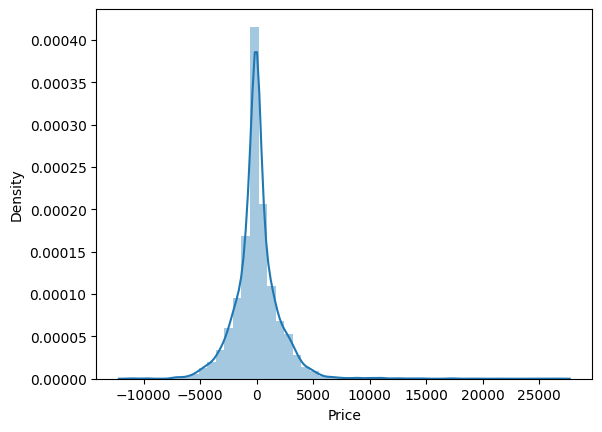

In [130]:
predict(RandomForestRegressor())

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

traning score: 0.6202514062333115
predections are: [11674.55490141 10936.74936372  9534.12569842 ...  5907.88175534
 11543.13376338 10361.66331614]


r2 score is: 0.6179824865846457
MAE:  1915.2341398977057
MSE:  7355412.952944082
RMSE:  43.76338812178172


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\4031971166.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predections)


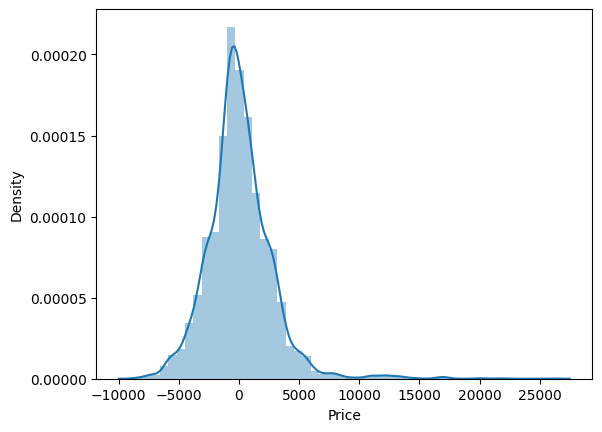

In [136]:
predict(LinearRegression())

traning score: 0.9903341268127855
predections are: [12692. 15373. 11999. ...  6482. 11467.  9627.]


r2 score is: 0.5720915211677496
MAE:  1583.289784694594
MSE:  8239003.3371460335
RMSE:  39.79057406842221


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\4031971166.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predections)


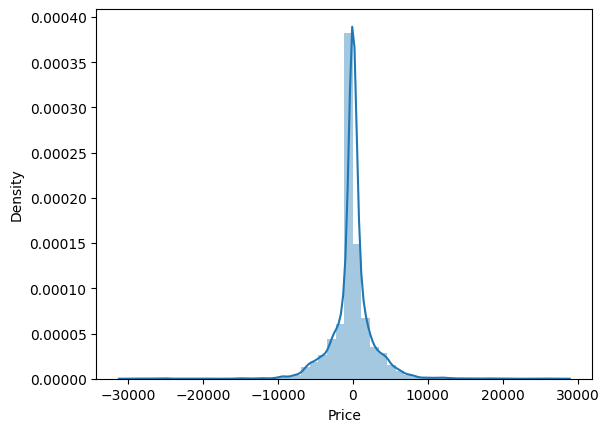

In [138]:
predict(DecisionTreeRegressor())

traning score: 0.7257259470989731
predections are: [ 9950.2 14017.2 10215.  ...  3586.2 11960.   8826.6]


r2 score is: 0.527279833036064
MAE:  2068.5620875263285
MSE:  9101813.181596069
RMSE:  45.481447729006256


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\4031971166.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predections)


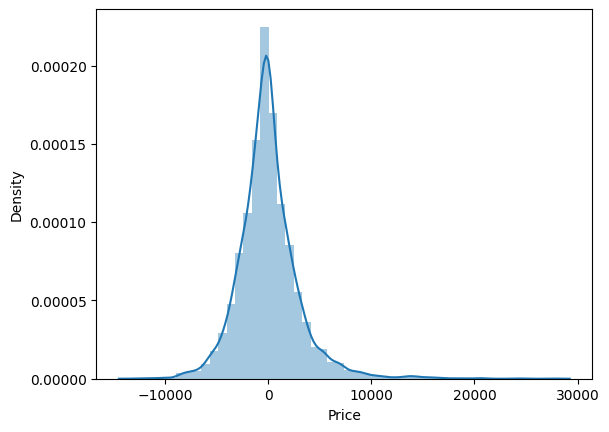

In [140]:
predict(KNeighborsRegressor())

In [141]:
# Q.hyper tune your model..

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
reg_rf=RandomForestRegressor()

In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomizedSearchCV()           #shift+tab

In [144]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [158]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':['sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [159]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [160]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [161]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [162]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [163]:
prediction=rf_random.predict(X_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='Price', ylabel='Density'>

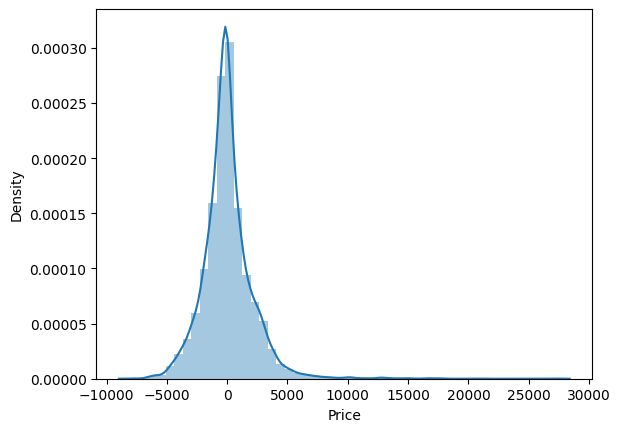

In [166]:
sns.distplot(y_test-prediction)

In [167]:
metrics.r2_score(y_test,prediction)

0.7629622453325537

In [172]:
file=open(r'C:\Users\Lenovo\OneDrive\Documents\ML\aireline_ticket_price\rf_random.pkl','wb')

In [174]:
import pickle

In [175]:
pickle.dump(rf_random,file)

In [177]:
model=open(r'C:\Users\Lenovo\OneDrive\Documents\ML\aireline_ticket_price\rf_random.pkl','rb')
forest=pickle.load(model)

In [180]:
predictions2=forest.predict(X_test)

In [181]:
metrics.r2_score(y_test,predictions2)

0.7629622453325537